Trying another tutorial using this [approach](https://www.kaggle.com/zakarii/dna-sequence-classification-cnn-gru)

In [1]:
import pandas as pd
import numpy as np
import os

import joblib

from keras import utils as np_utils
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, MaxPooling2D, Conv2D, LSTM, GRU, Bidirectional
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
import keras

In [2]:
#load the dataset
seq_data = pd.read_table('data/variants.aln4.fas.txt')

In [3]:
seq_data.head()

,Seq_Id,sequence,Variant_Id
0,hCoV19/gamma/Italy/CAMUniSa10/2021|EPI_ISL_101...,atgtttgtttttcttgttttattgccactagtctctagtcagtgtg...,gamma
1,hCoV19/gamma/Italy/CAMUniSa23/2021|EPI_ISL_101...,atgtttgtttttcttgttttattgccactagtctctagtcagtgtg...,gamma
2,hCoV19/gamma/Italy/CAMUniSa111/2021|EPI_ISL_10...,atgtttgtttttcttgttttattgccactagtctctagtcagtgtg...,gamma
3,hCoV19/gamma/South Korea/NMCnCoV09/2021|EPI_IS...,atgtttgtttttcttgttttattgccactagtctctagtcagtgtg...,gamma
4,hCoV19/gamma/Brazil/PRBT74803FI/2021|EPI_ISL_9...,atgtttgtttttcttgttttattgccactagtctctagtcagtgtg...,gamma


In [14]:
seq_data.Variant_Id.values

243

In [5]:
#map the variants to numeric form
variant = {"gamma" : 1, "delta" : 2, "beta":3, "Alpha":4, "omicron":5}
seq_data["Variant_Id"] = seq_data["Variant_Id"].map(variant)

#drop  seq_id column and have the nucleotides in uppercase
seq_data = seq_data.drop(["Seq_Id"], axis=1)
seq_data['sequence'] = seq_data['sequence'].str.upper()

In [ ]:
seq_data.head()

,sequence,Variant_Id
0,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,0
1,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,0
2,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,0
3,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,0
4,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,0


In [6]:
#Check characters in the seqeunce column
ntds = []
for i in seq_data['sequence']:
    for seq in i:

        ntd = seq.strip()
        ntds.append(ntd)
    
list(set(ntds))

['-', 'G', 'T', 'C', 'A', 'N']

In [7]:
sequence_data = list(seq_data.loc[:, 'sequence'])

In [8]:
encoded_list = []

def encode_seq(s):
    Encode = {'A':[1,0,0,0,0,0],'T':[0,1,0,0,0,0],'C':[0,0,1,0,0,0],'G':[0,0,0,1,0,0], '-':[0,0,0,0,0,0],'N':[0,0,0,0,0,0]}
    return [Encode[x] for x in s]

for i in sequence_data:
    x = encode_seq(i)
    encoded_list.append(x)

X_mine = np.array(encoded_list)
X_mine.shape

(86, 3831, 6)

In [9]:
encoded_list[1]

[[1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0,

In [ ]:
seq_data["Variant_Id"].unique()

array([0, 2, 1, 3, 4])

In [10]:
y_mine = seq_data['Variant_Id']
y_mine.shape

(86,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_mine, y_mine, random_state = 42, stratify = y_mine)
from keras import utils as np_utils


y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [ ]:
params = {
    'first_node': [128, 64],
    'second_node': [32, 64],
    'alpha': [0.001, 0.01],
    'first_filter': [9, 16, 32], 
    'dropout': [0.1, 0.2, 0.5]
}

gru_model = Sequential()

#Layer 1 - feature extraction
#Performs dimension reduction

gru_model.add(Conv1D(filters = 27, kernel_size = (4), activation = 'relu', input_shape = (3831, 6))) #ensure you change the shape
gru_model.add(MaxPooling1D(pool_size= (3)))
gru_model.add(Dropout(0.2))
gru_model.add(Conv1D(filters = 14, kernel_size = (2), activation = 'relu', padding = 'same'))


gru_model.add(Bidirectional(GRU(128, activation = 'relu')))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(128, activation = 'relu'))
gru_model.add(Dense(64, activation = 'relu'))
gru_model.add(Dense(64, activation = 'relu'))
gru_model.add(Dense(16, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
gru_model.add(Dense(5, activation = 'softmax'))

#gru_model.add(Flatten())

gru_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.0005, patience=8, 
                                           restore_best_weights=True )
history = gru_model.fit(X_train, y_train, batch_size = 128, validation_data=(X_test, y_test), 
                        epochs=15)

Epoch 1/15
1/1 [==============================] - 11s 11s/step - loss: 0.9375 - accuracy: 0.2188 - val_loss: 0.9301 - val_accuracy: 0.1818
Epoch 2/15
1/1 [==============================] - 4s 4s/step - loss: 0.9301 - accuracy: 0.2031 - val_loss: 0.9219 - val_accuracy: 0.1818
Epoch 3/15
1/1 [==============================] - 5s 5s/step - loss: 0.9217 - accuracy: 0.2031 - val_loss: 0.9136 - val_accuracy: 0.1818
Epoch 4/15
1/1 [==============================] - 6s 6s/step - loss: 0.9137 - accuracy: 0.2031 - val_loss: 0.9045 - val_accuracy: 0.1818
Epoch 5/15
1/1 [==============================] - 6s 6s/step - loss: 0.9039 - accuracy: 0.2031 - val_loss: 0.8947 - val_accuracy: 0.1818
Epoch 6/15
1/1 [==============================] - 6s 6s/step - loss: 0.8933 - accuracy: 0.2031 - val_loss: 0.8838 - val_accuracy: 0.1818
Epoch 7/15
1/1 [==============================] - 4s 4s/step - loss: 0.8809 - accuracy: 0.2031 - val_loss: 0.8721 - val_accuracy: 0.1818
Epoch 8/15
1/1 [=======================

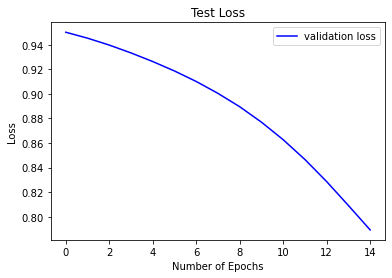

In [ ]:
# Plot the loss and accuracy curves for training and validation 

import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

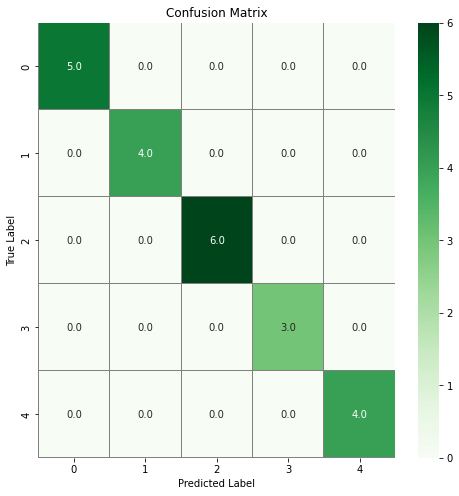

In [ ]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = gru_model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(y_test,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()